<a href="https://colab.research.google.com/github/alevchencko/-2-8-/blob/main/%D0%9B%D0%A0_%D0%A7%D0%9C_7_%D0%9B%D0%B5%D0%B2%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from math import factorial
# задані точки
x = np.array([0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55])
y = np.array([20.1946, 19.6133, 18.9425, 18.1746, 17.3010, 16.3123, 15.1984, 13.9484, 12.5508, 10.9937, 9.2647])
# Перша інтерполяційна формула Ньютона (інтерполяція вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)
    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]
    # Обчислення значення q
    q = (x0 - x[0]) / h
    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1
    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*(q-2)*...*(q-i+1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)
    return ans
# Обчислюємо значення функції в точці x = 0.455
x1 = 0.455
y1 = newton_forward_interpolation(x, y, x1)
print(f"f({x1}) = {y1}")

f(0.455) = 19.914663939666767


In [2]:
import numpy as np
from math import factorial
# задані точки
x = np.array([0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55])
y = np.array([20.1946, 19.6133, 18.9425, 18.1746, 17.3010, 16.3123, 15.1984, 13.9484, 12.5508, 10.9937, 9.2647])
# Друга інтерполяційна формула Ньютона (інтерполяція назад)
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)
    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]
    # Обчислення значення q
    q = (x0 - x[-1]) / h
    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1
    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)
    return ans
# Обчислюємо значення функції в точці x = 0.543
x2 = 0.543
y2 = newton_backward_interpolation(x, y, x2)
print(f"f({x2}) = {y2}")

f(0.543) = 10.493619315229283


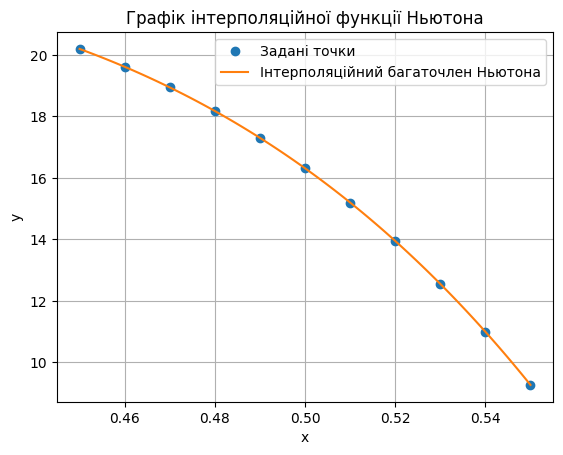

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
# задані точки
x = np.array([0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55])
y = np.array([20.1946, 19.6133, 18.9425, 18.1746, 17.3010, 16.3123, 15.1984, 13.9484, 12.5508, 10.9937, 9.2647])
# Функція для інтерполяції вперед
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]
    q = (x0 - x[0]) / h
    ans = delta_y[0, 0]
    q_prod = 1
    for i in range(1, n):
        q_prod *= (q - i + 1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)
    return ans
# Функція для інтерполяції назад
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]
    q = (x0 - x[-1]) / h
    ans = delta_y[-1, 0]
    q_prod = 1
    for i in range(1, n):
        q_prod *= (q + i - 1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)
    return ans
# Будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    if xx[i] <= x[len(x) // 2]:
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:
        yy[i] = newton_backward_interpolation(x, y, xx[i])
# Візуалізація
plt.plot(x, y, 'o', label='Задані точки')
plt.plot(xx, yy, label="Інтерполяційний багаточлен Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Графік інтерполяційної функції Ньютона")
plt.show()